## Load Necessary Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Process the EV data

In [35]:
EV = pd.read_csv('data/Electric_Vehicle_Population_Size_History_By_County.csv',
                 usecols=['Date', 'County', 'State', 'Vehicle Primary Use', 'Electric Vehicle (EV) Total', 'Total Vehicles'])

# only maintain Vehicle Parimary Use == 'Passenger'
# only maintain State == WA
EV = EV[EV['State'] == 'WA']
EV = EV[EV['Vehicle Primary Use'] == 'Passenger']
EV.reset_index(drop=True, inplace=True)

# transform Date column to only year
EV['Year'] = EV['Date'].str.split().apply(lambda x: x[-1])

# drop columns no longer useful
EV.drop(columns=['Vehicle Primary Use', 'State','Date'], inplace=True)
EV = EV[['Year', 'County', 'Electric Vehicle (EV) Total', 'Total Vehicles']]

# create the sum table
EV = EV.groupby(by=['Year', 'County']).sum()

# create the EV fraction column
EV['fraction EV'] = round(EV['Electric Vehicle (EV) Total']/EV['Total Vehicles'],4)
EV = EV[['fraction EV']].unstack().T.reset_index()

# only select useful columns
EV = EV[['County', '2019', '2020', '2021']]

EV.shape

(39, 4)

## Load the Per Capita Income data

In [36]:
income = pd.read_csv('data/income_WA.csv')
income['2019'] = income['2019'].str.split(',').apply(lambda x: int(x[0])*1000 + int(x[1]))
income['2020'] = income['2020'].str.split(',').apply(lambda x: int(x[0])*1000 + int(x[1]))
income['2021'] = income['2021'].str.split(',').apply(lambda x: int(x[0])*1000 + int(x[1]))

In [37]:
## Get the Merged Table
both_df = EV.merge(right=income, how='outer', on='County', suffixes=('_EV', '_income'))

In [38]:
both_df.sort_values(by='2021_EV', ascending=False)

,County,2019_EV,2020_EV,2021_EV,2019_income,2020_income,2021_income
27,San Juan,0.0198,0.0281,0.0385,81070,84496,87038
16,King,0.0187,0.0231,0.0288,95083,99734,108212
15,Jefferson,0.0126,0.0155,0.0204,54524,57847,60365
17,Kitsap,0.0092,0.0114,0.0149,58290,62308,67845
30,Snohomish,0.0096,0.0117,0.0148,58706,63477,68858
14,Island,0.0089,0.0111,0.0146,56646,60419,65188
36,Whatcom,0.0086,0.0106,0.0135,51683,54927,58137
5,Clark,0.0079,0.0099,0.0133,55543,58629,63427
33,Thurston,0.0077,0.0097,0.0125,52297,56527,61062
4,Clallam,0.0062,0.0080,0.0108,48024,51690,54894


In [39]:
both_df.sort_values(by='2021_income', ascending=False).head()

,County,2019_EV,2020_EV,2021_EV,2019_income,2020_income,2021_income
16,King,0.0187,0.0231,0.0288,95083,99734,108212
27,San Juan,0.0198,0.0281,0.0385,81070,84496,87038
6,Columbia,0.0018,0.0027,0.0035,57520,65425,70579
30,Snohomish,0.0096,0.0117,0.0148,58706,63477,68858
17,Kitsap,0.0092,0.0114,0.0149,58290,62308,67845


In [40]:
both_df.sort_values(by='2021_income', ascending=True).head()

,County,2019_EV,2020_EV,2021_EV,2019_income,2020_income,2021_income
10,Franklin,0.0020,0.0023,0.0036,39324,42756,45937
37,Whitman,0.0034,0.0042,0.0050,40744,44226,46502
24,Pacific,0.0033,0.0041,0.0059,41078,43968,46597
9,Ferry,0.0015,0.0021,0.0030,38465,44164,46847
13,Grays Harbor,0.0035,0.0046,0.0063,40717,44125,47094


In [41]:
both_df.sort_values(by='2021_EV', ascending=False).head()

,County,2019_EV,2020_EV,2021_EV,2019_income,2020_income,2021_income
27,San Juan,0.0198,0.0281,0.0385,81070,84496,87038
16,King,0.0187,0.0231,0.0288,95083,99734,108212
15,Jefferson,0.0126,0.0155,0.0204,54524,57847,60365
17,Kitsap,0.0092,0.0114,0.0149,58290,62308,67845
30,Snohomish,0.0096,0.0117,0.0148,58706,63477,68858


In [42]:
both_df.sort_values(by='2021_EV', ascending=True).head()

,County,2019_EV,2020_EV,2021_EV,2019_income,2020_income,2021_income
0,Adams,0.0009,0.0012,0.0019,40526,45040,47867
11,Garfield,0.0012,0.0008,0.0019,50341,56479,56792
25,Pend Oreille,0.0011,0.0015,0.0023,44448,48116,51623
38,Yakima,0.0013,0.0016,0.0023,43208,47315,50872
21,Lincoln,0.0014,0.0020,0.0026,45756,50879,51578


## Normalization 

In [43]:
both_df_nor = both_df.copy()

In [44]:
both_df_nor['2020_EV'] = round(both_df_nor['2020_EV']/both_df_nor['2019_EV'], 3)
both_df_nor['2021_EV'] = round(both_df_nor['2021_EV']/both_df_nor['2019_EV'], 3)
both_df_nor['2019_EV'] = 1.0

both_df_nor['2021_income'] = round(both_df_nor['2021_income']/both_df_nor['2019_income'], 3)
both_df_nor['2020_income'] = round(both_df_nor['2020_income']/both_df_nor['2019_income'], 3)
both_df_nor['2019_income'] = 1.0

## Linear regression model -- EV and income data

In [45]:
X_train_full = both_df_nor[['2019_EV', '2020_EV', '2019_income','2020_income', '2021_income']].to_numpy(dtype='float')
y_train_full = both_df_nor[['2021_EV']].to_numpy(dtype='float')

In [46]:
from sklearn import linear_model
regr_full = linear_model.LinearRegression()
regr_full.fit(X_train_full, y_train_full)
y_pred_full = regr_full.predict(X_train_full)
full_model_error = np.squeeze(y_pred_full - y_train_full)

## Linear regression model -- only prior EV data

In [47]:
X_train_partial = both_df_nor[['2019_EV', '2020_EV']].to_numpy(dtype='float')
y_train_partial = both_df_nor[['2021_EV']].to_numpy(dtype='float')

In [48]:
regr_partial = linear_model.LinearRegression()
regr_partial.fit(X_train_partial, y_train_partial)
y_pred_partial = regr_partial.predict(X_train_partial)
partial_model_error = np.squeeze(y_pred_partial - y_train_partial)

## plot the errors

In [49]:
max(partial_model_error)

0.3022420688480034

In [50]:
max(full_model_error)

0.3977619217642221

In [51]:
min(full_model_error)

-0.6766641201164123

In [52]:
min(partial_model_error)

-0.918002845037688

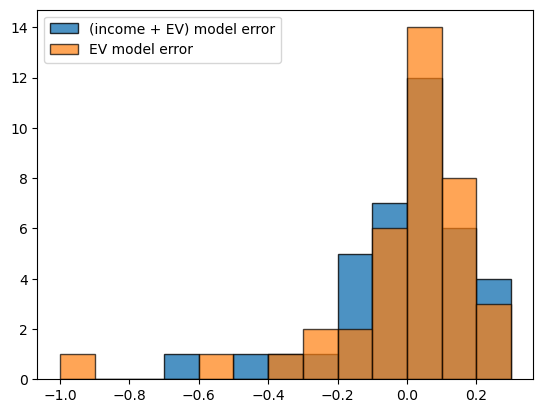

In [53]:
bins = np.arange(start=-1, stop=0.4, step=0.1)
# bins = np.arange(start=-0.002, stop=0.001, step=0.0001)
plt.hist(full_model_error, label='(income + EV) model error', alpha=.8, edgecolor='black', bins=bins)
plt.hist(partial_model_error, label='EV model error', alpha=0.7, edgecolor='black', bins=bins)
plt.legend()
plt.show()

In [54]:
from scipy.stats import kruskal
kruskal(full_model_error, partial_model_error)

# no normalization: 0.8454939839778679
# with normalization: 0.7377907470688871

KruskalResult(statistic=0.11207791592981732, pvalue=0.7377907470688871)

## Random Forest

In [55]:
X_train_full = both_df[['2019_EV', '2020_EV', '2019_income','2020_income', '2021_income']].to_numpy(dtype='float')
y_train_full = both_df[['2021_EV']].to_numpy(dtype='float').ravel()

X_train_partial = both_df[['2019_EV', '2020_EV']].to_numpy(dtype='float')
y_train_partial = both_df[['2021_EV']].to_numpy(dtype='float').ravel()

In [56]:
from sklearn.ensemble import RandomForestRegressor
regr_full = RandomForestRegressor(min_samples_leaf=5)
regr_full.fit(X_train_full, np.ravel(y_train_full))
y_pred_full = regr_full.predict(X_train_full)
full_model_error = np.squeeze(y_pred_full - y_train_full)

regr_partial = RandomForestRegressor(min_samples_leaf=5)
regr_partial.fit(X_train_partial, np.ravel(y_train_partial))
y_pred_partial = regr_partial.predict(X_train_partial)
partial_model_error = np.squeeze(y_pred_partial - y_train_full)

In [57]:
max(partial_model_error)

0.004906536371961374

In [58]:
min(partial_model_error)

-0.018793463628038624

In [59]:
max(full_model_error)

0.004446154768107703

In [60]:
min(full_model_error)

-0.019253845231892296

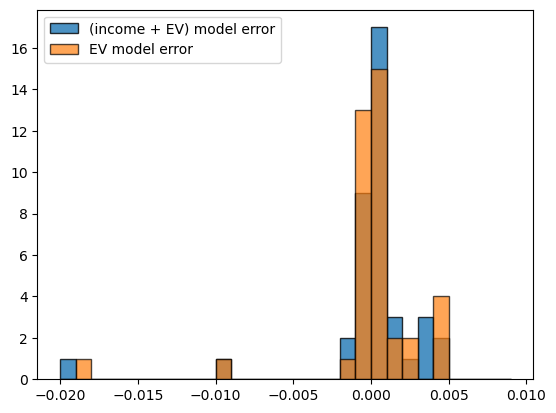

In [61]:
bins = np.arange(start=-0.02, stop=0.01, step=0.001)
# bins = np.arange(start=-0.002, stop=0.001, step=0.0001)
plt.hist(full_model_error, label='(income + EV) model error', alpha=.8, edgecolor='black', bins=bins)
plt.hist(partial_model_error, label='EV model error', alpha=0.7, edgecolor='black', bins=bins)
plt.legend()
plt.show()

In [62]:
kruskal(full_model_error, partial_model_error) # 0.4096727713969591

KruskalResult(statistic=0.059947088248631146, pvalue=0.8065795892210244)

[Text(0.6, 0.875, '2020_EV <= 0.009\nsquared_error = 0.0\nsamples = 26\nvalue = 0.008'),
 Text(0.4, 0.625, '2019_EV <= 0.002\nsquared_error = 0.0\nsamples = 19\nvalue = 0.005'),
 Text(0.2, 0.375, 'squared_error = 0.0\nsamples = 8\nvalue = 0.003'),
 Text(0.6, 0.375, '2019_EV <= 0.004\nsquared_error = 0.0\nsamples = 11\nvalue = 0.006'),
 Text(0.4, 0.125, 'squared_error = 0.0\nsamples = 6\nvalue = 0.005'),
 Text(0.8, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.008'),
 Text(0.8, 0.625, 'squared_error = 0.0\nsamples = 7\nvalue = 0.018')]

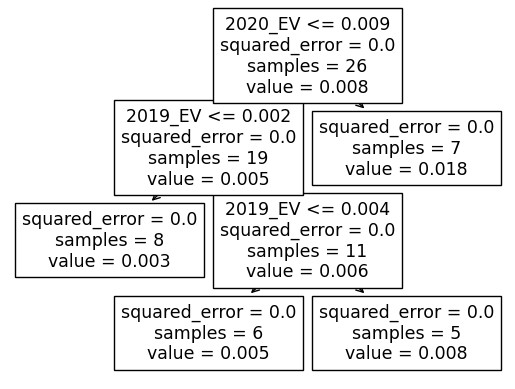

In [63]:
from sklearn import tree
tree.plot_tree(regr_full.estimators_[0], feature_names=['2019_EV', '2020_EV', '2019_income','2020_income', '2021_income'])

[Text(0.6666666666666666, 0.875, '2019_EV <= 0.008\nsquared_error = 0.0\nsamples = 23\nvalue = 0.008'),
 Text(0.5, 0.625, '2019_EV <= 0.004\nsquared_error = 0.0\nsamples = 18\nvalue = 0.005'),
 Text(0.3333333333333333, 0.375, '2019_EV <= 0.003\nsquared_error = 0.0\nsamples = 10\nvalue = 0.004'),
 Text(0.16666666666666666, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.003'),
 Text(0.5, 0.125, 'squared_error = 0.0\nsamples = 5\nvalue = 0.005'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 8\nvalue = 0.009'),
 Text(0.8333333333333334, 0.625, 'squared_error = 0.0\nsamples = 5\nvalue = 0.022')]

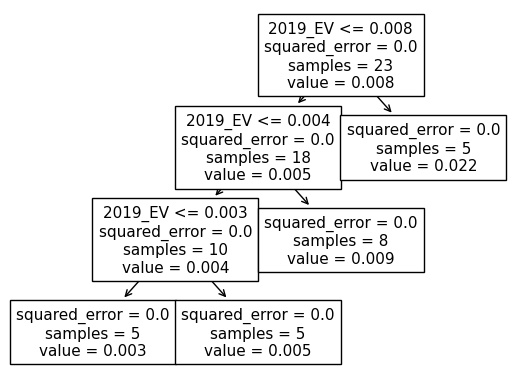

In [64]:
tree.plot_tree(regr_partial.estimators_[0], feature_names=['2019_EV', '2020_EV'])